In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import csv
from pandas import DataFrame,date_range
import matplotlib.dates as mdates

Oct14 = pd.read_csv('Oct14_combo.csv')
Nov2 = pd.read_csv('Nov2_combo.csv')
Nov3 = pd.read_csv('Nov3_combo.csv')
Nov4 = pd.read_csv('Nov4_combo.csv')
Nov10 = pd.read_csv('Nov10_combo.csv')

# selected locations
hospital_Oct14 = pd.read_csv('LandUseTextFiles/Oct14hospital.txt')
campus_Oct14 = pd.read_csv('LandUseTextFiles/Oct14campus.txt')
busi_Oct14 = pd.read_csv('LandUseTextFiles/Oct14business.txt')
neib_Oct14 = pd.read_csv('LandUseTextFiles/Oct14neighborhood.txt')
ovp_Oct14 = pd.read_csv('LandUseTextFiles/Oct14over.txt')
sloop_Oct14 = pd.read_csv('LandUseTextFiles/Oct14small.txt')
                        
hospital_Nov2 = pd.read_csv('LandUseTextFiles/Nov2hospital.txt')
campus_Nov2 = pd.read_csv('LandUseTextFiles/Nov2campus.txt')
busi_Nov2 = pd.read_csv('LandUseTextFiles/Nov2business.txt')
neib_Nov2 = pd.read_csv('LandUseTextFiles/Nov2neighborhood.txt')
ovp_Nov2 = pd.read_csv('LandUseTextFiles/Nov2over.txt')
sloop_Nov2 = pd.read_csv('LandUseTextFiles/Nov2small.txt')

hospital_Nov3 = pd.read_csv('LandUseTextFiles/Nov3hospital.txt')
campus_Nov3 = pd.read_csv('LandUseTextFiles/Nov3campus.txt')
busi_Nov3 = pd.read_csv('LandUseTextFiles/Nov3campus.txt')
neib_Nov3 = pd.read_csv('LandUseTextFiles/Nov3neighborhood.txt')
ovp_Nov3 = pd.read_csv('LandUseTextFiles/Nov3over.txt')
sloop_Nov3 = pd.read_csv('LandUseTextFiles/Nov3small.txt')
                        
hospital_Nov4 = pd.read_csv('LandUseTextFiles/Nov4hospital.txt')
campus_Nov4 = pd.read_csv('LandUseTextFiles/Nov4campus.txt')
busi_Nov4 = pd.read_csv('LandUseTextFiles/Nov4business.txt')
neib_Nov4 = pd.read_csv('LandUseTextFiles/Nov4neighborhood.txt')
ovp_Nov4 = pd.read_csv('LandUseTextFiles/Nov4over.txt')
sloop_Nov4 = pd.read_csv('LandUseTextFiles/Nov4small.txt')
                        
hospital_Nov10 = pd.read_csv('LandUseTextFiles/Nov10hospital.txt')
campus_Nov10 = pd.read_csv('LandUseTextFiles/Nov10campus.txt')
busi_Nov10 = pd.read_csv('LandUseTextFiles/Nov10business.txt')
neib_Nov10 = pd.read_csv('LandUseTextFiles/Nov10neighborhood.txt')
ovp_Nov10 = pd.read_csv('LandUseTextFiles/Nov10over.txt')
sloop_Nov10 = pd.read_csv('LandUseTextFiles/Nov10small.txt')

In [2]:
#get_datetime = lambda s: datetime.datetime.strptime(s, "%H:%M:%S %p")
Oct14time = Oct14['sck_fs_time']
Oct14x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in Oct14time]
Nov2time = Nov2['sck_adj_time']
Nov2x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in Nov2time]
Nov3time = Nov3['sckfs_time']
Nov3x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in Nov3time]
Nov4time = Nov4['sck_time']
Nov4x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in Nov4time]
Nov10time = Nov10['sck_fs_time']
Nov10x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in Nov10time]
xfmt = mdates.DateFormatter('%H:%M')

In [3]:
def box_array(array):
    stat = array.describe()
    box = np.array([stat[3],stat[4],stat[5],stat[6],stat[7]])
    return box

In [4]:
h14 = hospital_Oct14['sck_COppm']
h2 = hospital_Nov2['sck_COppm']
h3 = hospital_Nov3['sck_COppm']
h4 = hospital_Nov4['sck_COppm']
h10 = hospital_Nov10['sck_COppm']

c14 = campus_Oct14['sck_COppm']
c2 = campus_Nov2['sck_COppm']
c3 = campus_Nov3['sck_COppm']
c4 = campus_Nov4['sck_COppm']
c10 = campus_Nov10['sck_COppm']

b14 = busi_Oct14['sck_COppm']
b2 = busi_Nov2['sck_COppm']
b3 = busi_Nov3['sck_COppm']
b4 = busi_Nov4['sck_COppm']
b10 = busi_Nov10['sck_COppm']

n14 = neib_Oct14['sck_COppm']
n2 = neib_Nov2['sck_COppm']
n3 = neib_Nov3['sck_COppm']
n4 = neib_Nov4['sck_COppm']
n10 = neib_Nov10['sck_COppm']

o14 = ovp_Oct14['sck_COppm']
o2 = ovp_Nov2['sck_COppm']
o3 = ovp_Nov3['sck_COppm']
o4 = ovp_Nov4['sck_COppm']
o10 = ovp_Nov10['sck_COppm']

s14 = sloop_Oct14['sck_COppm']
s2 = sloop_Nov2['sck_COppm']
s3 = sloop_Nov3['sck_COppm']
s4 = sloop_Nov4['sck_COppm']
s10 = sloop_Nov10['sck_COppm']

In [5]:
def combine_by_landuse(oct14,nov2,nov3,nov4,nov10):
    new = []
    new2 = []
    new3 = []
    new4 = []
    new = np.append(oct14,nov2)
    new2 = np.append(new,nov3)
    new3 = np.append(new2,nov4)
    new4 = np.append(new3,nov10)
    return new4

In [6]:
hospital_all = combine_by_landuse(h14,h2,h3,h4,h10)
campus_all = combine_by_landuse(c14,c2,c3,c4,c10)

In [7]:
def setBoxColors(bp):
    # date 1
    setp(bp['boxes'][0], color='b') # box
    setp(bp['caps'][0], color='b') # bottom cap
    setp(bp['caps'][1], color='b') # top cap
    setp(bp['whiskers'][0], color='b') # bottom whisker
    setp(bp['whiskers'][1], color='b') # top whisker
    setp(bp['fliers'][0], color='b') # both fliers
    setp(bp['medians'][0], color='b') # median
    
    setp(bp['boxes'][1], color='r') # box
    setp(bp['caps'][2], color='r') # bottom cap
    setp(bp['caps'][3], color='r') # top cap
    setp(bp['whiskers'][2], color='r') # bottom whisker
    setp(bp['whiskers'][3], color='r') # top whisker
    setp(bp['fliers'][1], color='r') # both fliers
    setp(bp['medians'][1], color='r') # median

    setp(bp['boxes'][2], color='g') # box
    setp(bp['caps'][4], color='g') # bottom cap
    setp(bp['caps'][5], color='g') # top cap
    setp(bp['whiskers'][4], color='g') # bottom whisker
    setp(bp['whiskers'][5], color='g') # top whisker
    setp(bp['fliers'][2], color='g') # both fliers
    setp(bp['medians'][2], color='g') # median
    
    setp(bp['boxes'][3], color='purple') # box
    setp(bp['caps'][6], color='purple') # bottom cap
    setp(bp['caps'][7], color='purple') # top cap
    setp(bp['whiskers'][6], color='purple') # bottom whisker
    setp(bp['whiskers'][7], color='purple') # top whisker
    setp(bp['fliers'][3], color='purple') # both fliers
    setp(bp['medians'][3], color='purple') # median

    setp(bp['boxes'][4], color='orange') # box
    setp(bp['caps'][8], color='orange') # bottom cap
    setp(bp['caps'][9], color='orange') # top cap
    setp(bp['whiskers'][8], color='orange') # bottom whisker
    setp(bp['whiskers'][9], color='orange') # top whisker
    setp(bp['fliers'][4], color='orange') # both fliers
    setp(bp['medians'][4], color='orange') # median

In [8]:
A = [box_array(h14),box_array(h2),box_array(h3),box_array(h4),box_array(h10)]
B = [box_array(c14),box_array(c2),box_array(c3),box_array(c4),box_array(c10)]
C = [box_array(b14),box_array(b2),box_array(b3),box_array(b4),box_array(b10)]
D = [box_array(n14),box_array(n2),box_array(n3),box_array(n4),box_array(n10)]
E = [box_array(o14),box_array(o2),box_array(o3),box_array(o4),box_array(o10)]
F = [box_array(s14),box_array(s2),box_array(s3),box_array(s4),box_array(s10)]

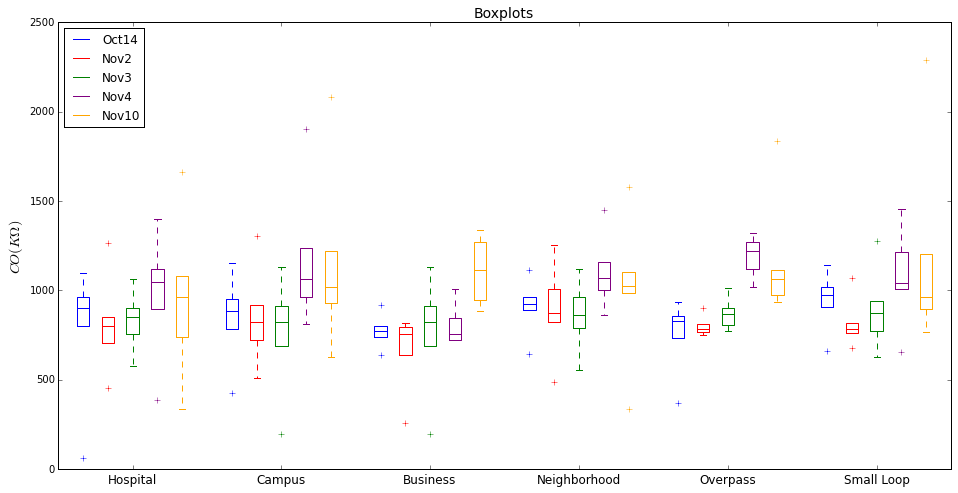

In [12]:
''' code adopted from http://stackoverflow.com/questions/16592222/matplotlib-group-boxplots'''

from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes
fig = figure(figsize=[16,8])
ax = axes()
hold(True)

# first boxplot pair
bp = boxplot(A, positions = [1,2,3,4,5], widths = 0.5)
setBoxColors(bp)

# second boxplot pair
bp = boxplot(B, positions = [7,8,9,10,11], widths = 0.5)
setBoxColors(bp)

# thrid boxplot pair
bp = boxplot(C, positions = [13,14,15,16,17], widths = 0.5)
setBoxColors(bp)

# # fourth boxplot pair
bp = boxplot(D, positions = [19,20,21,22,23], widths = 0.5)
setBoxColors(bp)

# # fifth boxplot pair
bp = boxplot(E, positions = [25,26,27,28,29], widths = 0.5)
setBoxColors(bp)

# # sixth boxplot pair
bp = boxplot(F, positions = [31,32,33,34,35], widths = 0.5)
setBoxColors(bp)

# set axes limits and labels
xlim(0,36)
ax.set_xticklabels(['Hospital', 'Campus','Business','Neighborhood','Overpass','Small Loop'],fontsize=12)
#ax.set_xticklabels(['Hospital', 'Campus','Neighborhood'],fontsize=12)
ax.set_xticks([3,9,15,21,27,33])
#ax.set_xticks([2,6,10])

# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1],'b-')
hR, = plot([1,1],'r-')
hG, = plot([1,1],'g-')
hP, = plot([1,1],'-',c='purple')
hO, = plot([1,1],'-',c='orange')
legend((hB, hR, hG, hP, hO),('Oct14', 'Nov2', 'Nov3', 'Nov4', 'Nov10'),fontsize=12,loc='upper left')
hB.set_visible(False)
hR.set_visible(False)

ax.set_title('Boxplots',fontsize=14)
ax.set_ylabel('$CO (K\Omega)$',fontsize=14)

In [10]:
def boxplot_days(data1,data2,data3,data4,data5,title,ylabel):
    fig = figure(figsize=[12,8])
    ax = axes()
    ax.set_title(title,fontsize=14)
    ax.set_ylabel(ylabel,fontsize=18)
    ax.boxplot(data1, positions=[1], widths=0.3)
    ax.boxplot(data2, positions=[2], widths=0.3)
    ax.boxplot(data3, positions=[3], widths=0.3)
    ax.boxplot(data4, positions=[4], widths=0.3)
    ax.boxplot(data5, positions=[5], widths=0.3)
    xlim(0.5,5.5)
    ax.set_xticks([1,2,3,4,5])
    ax.set_yticklabels([0,500,1000,1500,2000,2500],fontsize=14)
    ax.set_xticklabels(['Oct14', 'Nov2','Nov3','Nov4','Nov10'],fontsize=16)

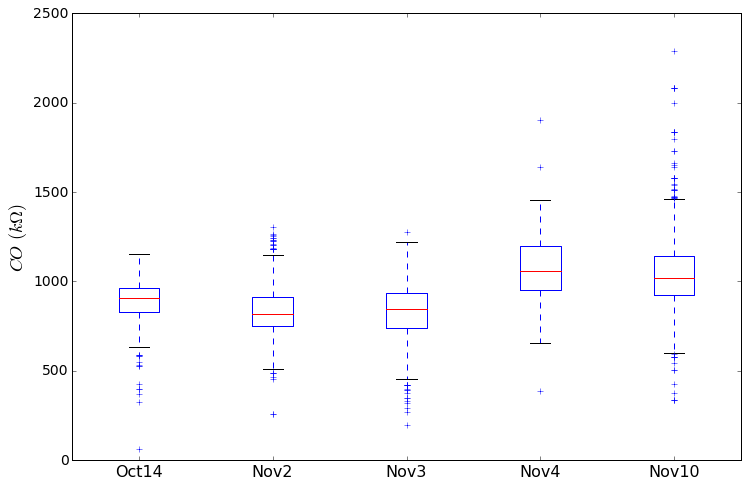

In [11]:
boxplot_days(Oct14['sck_COppm'],Nov2['sck_COppm'],Nov3['sck_COppm'],Nov4['sck_COppm'],Nov10['sck_COppm'],'','$CO$ $(k\Omega)$')

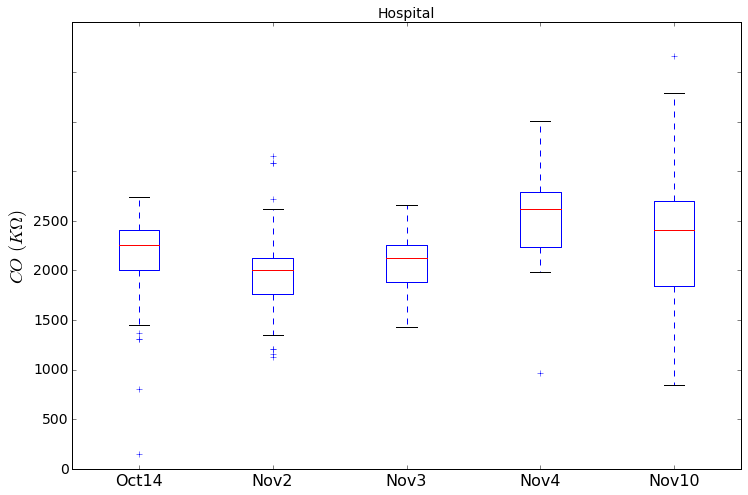

In [14]:
boxplot_days(h14,h2,h3,h4,h10,'Hospital','$CO$ $(K\Omega)$')

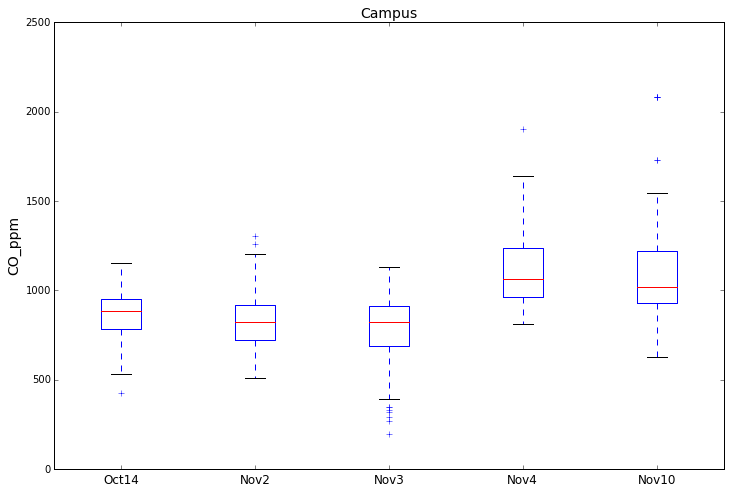

In [14]:
boxplot_days(c14,c2,c3,c4,c10,'Campus','CO_ppm')

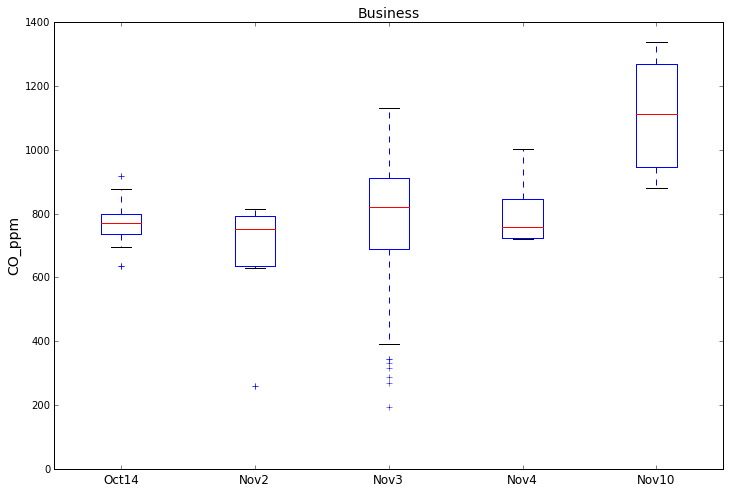

In [15]:
boxplot_days(b14,b2,b3,b4,b10,'Business','CO_ppm')

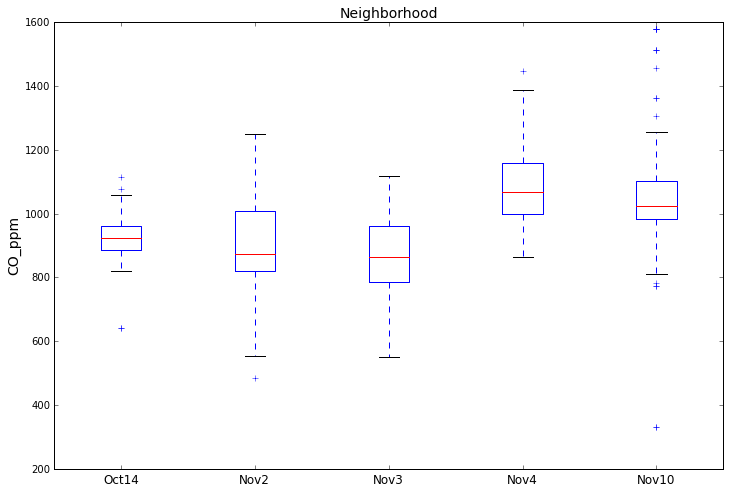

In [16]:
boxplot_days(n14,n2,n3,n4,n10,'Neighborhood','CO_ppm')

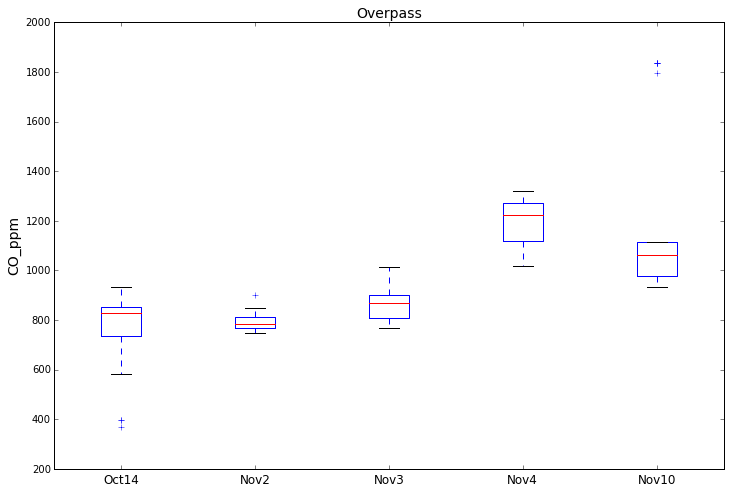

In [17]:
boxplot_days(o14,o2,o3,o4,o10,'Overpass','CO_ppm')

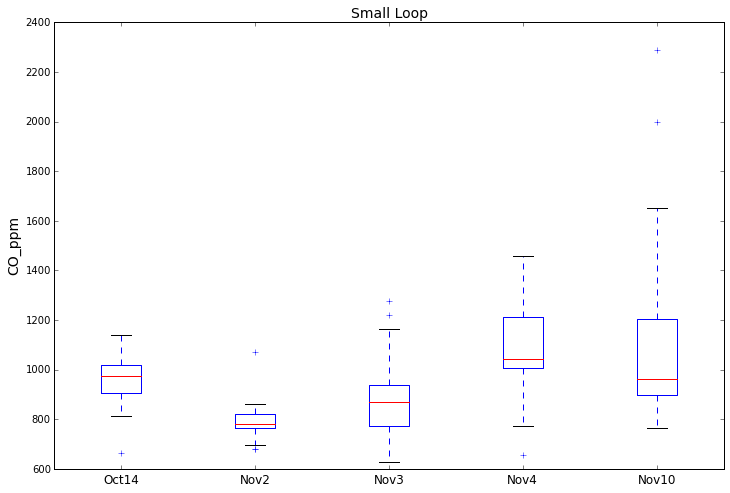

In [18]:
boxplot_days(s14,s2,s3,s4,s10,'Small Loop','CO_ppm')